#Pre Food Waste analysis: set environment

Before starting the analyis let us undertsand where the environment is set

In [176]:
from google.colab import drive
drive.mount('/content/drive')

import os
path = '/content/drive/MyDrive/Colab Notebooks/cece'

list(os.listdir(path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['1_introducao.ipynb',
 '2_numPy.ipynb',
 '03.01_pandas.ipynb',
 'data',
 '03.02_pandas.ipynb',
 'foodWasteDataSet.csv',
 'foodWaste.ipynb']

#Imports

In [177]:
import pandas as pd
import numpy as np

# Pre-Processing
from datetime import datetime

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

#Loading CSV file

In [178]:
# Load the CSV file into a DataFrame

df = pd.read_csv(path +'/foodWasteDataSet.csv', sep=';', encoding='latin1')
df.head()

,Date,Household_ID,Household_Size,Income (Â£),Region,Urban_Rural,Education_Level,Marital_Status,Children,Age_Group,...,Meal_Planning_Frequency,Food_Waste_Quantification,Perishable_Food_Management,Food_Donation_Frequency,Food_Waste_Reduction_Strategies,Technology_Use,Food_Waste_Reduction_Success,Food_Type,Purchase_Quantity,Waste_Quantity
0,01/01/2023,1,4,"59,170.00",South,Urban,Bachelor,Divorced,3,31-45,...,Rarely,Regularly,Prompt Consumption,Occasionally,Reduced Portions,Low,Successful,Vegetables,16,6
1,02/01/2023,2,5,"67,500.00",West,Rural,High School,Married,3,18-30,...,Weekly,Regularly,Storage,Occasionally,Smart Shopping,Moderate,Partial,Meat,16,5
2,03/01/2023,3,3,"68,477.00",West,Rural,Master,Married,1,46-60,...,Rarely,Regularly,Preservation,Rarely,Reduced Portions,Moderate,Partial,Vegetables,16,2
3,04/01/2023,4,4,"58,409.00",North,Rural,Master,Single,3,31-45,...,Rarely,Rarely,Preservation,Rarely,Reduced Portions,High,Successful,Fruits,16,6
4,05/01/2023,5,3,"30,667.00",East,Rural,PhD,Married,1,31-45,...,Rarely,Sometimes,Prompt Consumption,Rarely,Meal Planning,Moderate,Successful,Meat,16,3


#Pre processing

'Date' feature has only the role of counter

In [179]:
df['Date']

0        01/01/2023
1        02/01/2023
2        03/01/2023
3        04/01/2023
4        05/01/2023
            ...    
10271    14/02/2051
10272    15/02/2051
10273    16/02/2051
10274    17/02/2051
10275    18/02/2051
Name: Date, Length: 10276, dtype: object

Counting the number of days and comparing it to the number of rows above

In [180]:
# Define the start and end dates
start_date = datetime.strptime('01/01/2023', '%d/%m/%Y')
end_date = datetime.strptime('18/02/2051', '%d/%m/%Y')

# Calculate the difference between the two dates
delta = end_date - start_date

# Extract the number of days from the difference
num_days = delta.days

print("Number of days between the two dates:", num_days)


Number of days between the two dates: 10275


The column 'Date' is irrelevant: dates are related with the number of samples.

The column is thus dropped

In [181]:
df = df.drop('Date', axis=1)
df

,Household_ID,Household_Size,Income (Â£),Region,Urban_Rural,Education_Level,Marital_Status,Children,Age_Group,Occupation,...,Meal_Planning_Frequency,Food_Waste_Quantification,Perishable_Food_Management,Food_Donation_Frequency,Food_Waste_Reduction_Strategies,Technology_Use,Food_Waste_Reduction_Success,Food_Type,Purchase_Quantity,Waste_Quantity
0,1,4,"59,170.00",South,Urban,Bachelor,Divorced,3,31-45,Employed,...,Rarely,Regularly,Prompt Consumption,Occasionally,Reduced Portions,Low,Successful,Vegetables,16,6
1,2,5,"67,500.00",West,Rural,High School,Married,3,18-30,Unemployed,...,Weekly,Regularly,Storage,Occasionally,Smart Shopping,Moderate,Partial,Meat,16,5
2,3,3,"68,477.00",West,Rural,Master,Married,1,46-60,Unemployed,...,Rarely,Regularly,Preservation,Rarely,Reduced Portions,Moderate,Partial,Vegetables,16,2
3,4,4,"58,409.00",North,Rural,Master,Single,3,31-45,Student,...,Rarely,Rarely,Preservation,Rarely,Reduced Portions,High,Successful,Fruits,16,6
4,5,3,"30,667.00",East,Rural,PhD,Married,1,31-45,Employed,...,Rarely,Sometimes,Prompt Consumption,Rarely,Meal Planning,Moderate,Successful,Meat,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271,10272,4,"61,353.00",West,Urban,Bachelor,Divorced,3,18-30,Student,...,Rarely,Rarely,Prompt Consumption,Regularly,Meal Planning,High,Not Successful,Vegetables,1,0
10272,10273,3,"38,433.00",West,Urban,PhD,Married,1,61,Unemployed,...,Rarely,Rarely,Preservation,Rarely,Reduced Portions,Moderate,Partial,Fruits,1,2
10273,10274,1,"40,559.00",South,Urban,High School,Single,0,46-60,Unemployed,...,Weekly,Rarely,Prompt Consumption,Occasionally,Meal Planning,Moderate,Not Successful,Seafood,1,6
10274,10275,1,"28,981.00",West,Rural,High School,Divorced,0,46-60,Employed,...,Rarely,Regularly,Storage,Occasionally,Meal Planning,Low,Not Successful,Meat,1,0


To better understand the dataset a list of the features is shown

In [182]:
# Get the names of all columns
df.columns.tolist()

['Household_ID',
 'Household_Size',
 ' Income (Â£) ',
 'Region',
 'Urban_Rural',
 'Education_Level',
 'Marital_Status',
 'Children',
 'Age_Group',
 'Occupation',
 'Weekly_Grocery_Expenditure',
 'Fridge_Size',
 'Freezer_Size',
 'Food_Preferences',
 'Cooking_Frequency',
 'Leftover_Frequency',
 'Grocery_Shopping_Frequency',
 'Grocery_Store_Type',
 'Organic_Food_Preference',
 'Food_Waste_Perception',
 'Awareness_Programs',
 'Composting_Facility',
 'Food_Waste_Reasons',
 'Food_Preservation_Methods',
 'Food_Waste_Education',
 'Cooking_Skills',
 'Meal_Planning_Frequency',
 'Food_Waste_Quantification',
 'Perishable_Food_Management',
 'Food_Donation_Frequency',
 'Food_Waste_Reduction_Strategies',
 'Technology_Use',
 'Food_Waste_Reduction_Success',
 'Food_Type',
 'Purchase_Quantity',
 'Waste_Quantity']

In this section pandas' function 'set_option()' displays all the columns of the dataset

In [183]:
# Used to show all columns (instead of seeing ...)
pd.set_option('display.max_columns', None)

# Display the first rows of the DataFrame
df.head(5)

,Household_ID,Household_Size,Income (Â£),Region,Urban_Rural,Education_Level,Marital_Status,Children,Age_Group,Occupation,Weekly_Grocery_Expenditure,Fridge_Size,Freezer_Size,Food_Preferences,Cooking_Frequency,Leftover_Frequency,Grocery_Shopping_Frequency,Grocery_Store_Type,Organic_Food_Preference,Food_Waste_Perception,Awareness_Programs,Composting_Facility,Food_Waste_Reasons,Food_Preservation_Methods,Food_Waste_Education,Cooking_Skills,Meal_Planning_Frequency,Food_Waste_Quantification,Perishable_Food_Management,Food_Donation_Frequency,Food_Waste_Reduction_Strategies,Technology_Use,Food_Waste_Reduction_Success,Food_Type,Purchase_Quantity,Waste_Quantity
0,1,4,"59,170.00",South,Urban,Bachelor,Divorced,3,31-45,Employed,49,Small,Small,Vegetarian,Daily,Daily,Monthly,Local,No,Moderate,Yes,Yes,Portion Control,Refrigeration,No,Moderate,Rarely,Regularly,Prompt Consumption,Occasionally,Reduced Portions,Low,Successful,Vegetables,16,6
1,2,5,"67,500.00",West,Rural,High School,Married,3,18-30,Unemployed,97,Large,Small,Vegetarian,Weekly,Rarely,Monthly,Supermarket,Yes,High,No,No,Spoilage,Freezing,No,Moderate,Weekly,Regularly,Storage,Occasionally,Smart Shopping,Moderate,Partial,Meat,16,5
2,3,3,"68,477.00",West,Rural,Master,Married,1,46-60,Unemployed,273,Medium,Large,Vegetarian,Daily,Rarely,Daily,Supermarket,Yes,Low,Yes,Yes,Excess Purchases,Canning,Yes,Low,Rarely,Regularly,Preservation,Rarely,Reduced Portions,Moderate,Partial,Vegetables,16,2
3,4,4,"58,409.00",North,Rural,Master,Single,3,31-45,Student,141,Large,Large,Vegetarian,Daily,Weekly,Daily,Local,Yes,High,Yes,No,Excess Purchases,Canning,Yes,Moderate,Rarely,Rarely,Preservation,Rarely,Reduced Portions,High,Successful,Fruits,16,6
4,5,3,"30,667.00",East,Rural,PhD,Married,1,31-45,Employed,156,Medium,Small,Vegetarian,Daily,Rarely,Daily,Supermarket,Yes,High,Yes,Yes,Excess Purchases,Freezing,Yes,Moderate,Rarely,Sometimes,Prompt Consumption,Rarely,Meal Planning,Moderate,Successful,Meat,16,3


In [184]:
# Reset display options to their default values
pd.reset_option('display.max_columns')

## Values editing

To better handle further analysis, columns 'Technology_Use', 'Food_Waste_Perception', and 'Cooking_Skills' are modified in integers

In [185]:
print(df['Technology_Use'].unique())
print(df['Food_Waste_Perception'].unique())
print(df['Cooking_Skills'].unique())

['Low' 'Moderate' 'High']
['Moderate' 'High' 'Low']
['Moderate' 'Low' 'High']


In [186]:
# Define a mapping dictionary
mapping = {'Low': 0, 'Moderate': 1, 'High': 2}

Mapping the string values to numbers and replacing them in the DataFrame

In [187]:
# Map the string values to numbers and replace them in the DataFrame
df['Technology_Use'] = df['Technology_Use'].map(mapping)

# Display the modified DataFrame
df['Technology_Use'].head()

0    0
1    1
2    1
3    2
4    1
Name: Technology_Use, dtype: int64

In [188]:
df['Food_Waste_Perception'] = df['Food_Waste_Perception'].map(mapping)
df['Food_Waste_Perception']

0        1
1        2
2        0
3        2
4        2
        ..
10271    0
10272    0
10273    0
10274    0
10275    2
Name: Food_Waste_Perception, Length: 10276, dtype: int64

In [189]:
df['Cooking_Skills'] = df['Cooking_Skills'].map(mapping)
df['Cooking_Skills']

0        1
1        1
2        0
3        1
4        1
        ..
10271    1
10272    2
10273    2
10274    1
10275    1
Name: Cooking_Skills, Length: 10276, dtype: int64

Same is done with columns 'Fridge_Size' and 'Freezer_Size'

In [190]:
print(df['Fridge_Size'].unique())
print(df['Freezer_Size'].unique())

['Small' 'Large' 'Medium']
['Small' 'Large' 'Medium']


In [191]:
# Define a mapping dictionary
mapping_size = {'Small': 0, 'Medium': 1, 'Large': 2}

In [192]:
# Map the string values to numbers and replace them in the DataFrame
df['Fridge_Size'] = df['Fridge_Size'].map(mapping_size)

# Display the modified DataFrame
df['Fridge_Size']

0        0
1        2
2        1
3        2
4        1
        ..
10271    2
10272    0
10273    0
10274    0
10275    1
Name: Fridge_Size, Length: 10276, dtype: int64

In [193]:
# Map the string values to numbers and replace them in the DataFrame
df['Freezer_Size'] = df['Freezer_Size'].map(mapping_size)

# Display the modified DataFrame
df['Freezer_Size']

0        0
1        0
2        2
3        2
4        0
        ..
10271    1
10272    2
10273    2
10274    0
10275    0
Name: Freezer_Size, Length: 10276, dtype: int64

Now the first five rows of the modified columns are shown

In [194]:
df[['Technology_Use','Food_Waste_Perception','Cooking_Skills','Fridge_Size','Freezer_Size']].head()

,Technology_Use,Food_Waste_Perception,Cooking_Skills,Fridge_Size,Freezer_Size
0,0,1,1,0,0
1,1,2,1,2,0
2,1,0,0,1,2
3,2,2,1,2,2
4,1,2,1,1,0


## Splitting columns

'Age_Group' contains an interval of the form 'min-max'; let us implement a script which splits it into those two values

In [195]:
# Function to split Age_Group and handle '+' case
def split_age_group(row):
    if row.endswith('+'):
        return row[:-1], '100'
    else:
        return row.split('-')

For ease a new dataframe containing a copy of 'Household_ID' and 'Age_Group' columns is created

In [196]:
# Create a new DataFrame
df_age = df[['Household_ID','Age_Group']].copy()

df_age

,Household_ID,Age_Group
0,1,31-45
1,2,18-30
2,3,46-60
3,4,31-45
4,5,31-45
...,...,...
10271,10272,18-30
10272,10273,61
10273,10274,46-60
10274,10275,46-60


In [197]:
# Splitting 'Age_Group' column
df_age[['Min_Range_Age', 'Max_Range_Age']] = df['Age_Group'].apply(split_age_group).apply(pd.Series)

# Convert the columns into integer type
df_age['Max_Range_Age'] = df_age['Max_Range_Age'].fillna(100).astype(int)
df_age['Min_Range_Age'] = df_age['Min_Range_Age'].astype(int)

df_age

,Household_ID,Age_Group,Min_Range_Age,Max_Range_Age
0,1,31-45,31,45
1,2,18-30,18,30
2,3,46-60,46,60
3,4,31-45,31,45
4,5,31-45,31,45
...,...,...,...,...
10271,10272,18-30,18,30
10272,10273,61,61,100
10273,10274,46-60,46,60
10274,10275,46-60,46,60


To avoid redundant data, 'Age_Group' column is dropped from the original dataframe

In [198]:
# Drop 'Age_Group' column from the original DataFrame
df.drop(columns='Age_Group', inplace=True)

df

,Household_ID,Household_Size,Income (Â£),Region,Urban_Rural,Education_Level,Marital_Status,Children,Occupation,Weekly_Grocery_Expenditure,...,Meal_Planning_Frequency,Food_Waste_Quantification,Perishable_Food_Management,Food_Donation_Frequency,Food_Waste_Reduction_Strategies,Technology_Use,Food_Waste_Reduction_Success,Food_Type,Purchase_Quantity,Waste_Quantity
0,1,4,"59,170.00",South,Urban,Bachelor,Divorced,3,Employed,49,...,Rarely,Regularly,Prompt Consumption,Occasionally,Reduced Portions,0,Successful,Vegetables,16,6
1,2,5,"67,500.00",West,Rural,High School,Married,3,Unemployed,97,...,Weekly,Regularly,Storage,Occasionally,Smart Shopping,1,Partial,Meat,16,5
2,3,3,"68,477.00",West,Rural,Master,Married,1,Unemployed,273,...,Rarely,Regularly,Preservation,Rarely,Reduced Portions,1,Partial,Vegetables,16,2
3,4,4,"58,409.00",North,Rural,Master,Single,3,Student,141,...,Rarely,Rarely,Preservation,Rarely,Reduced Portions,2,Successful,Fruits,16,6
4,5,3,"30,667.00",East,Rural,PhD,Married,1,Employed,156,...,Rarely,Sometimes,Prompt Consumption,Rarely,Meal Planning,1,Successful,Meat,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271,10272,4,"61,353.00",West,Urban,Bachelor,Divorced,3,Student,165,...,Rarely,Rarely,Prompt Consumption,Regularly,Meal Planning,2,Not Successful,Vegetables,1,0
10272,10273,3,"38,433.00",West,Urban,PhD,Married,1,Unemployed,80,...,Rarely,Rarely,Preservation,Rarely,Reduced Portions,1,Partial,Fruits,1,2
10273,10274,1,"40,559.00",South,Urban,High School,Single,0,Unemployed,147,...,Weekly,Rarely,Prompt Consumption,Occasionally,Meal Planning,1,Not Successful,Seafood,1,6
10274,10275,1,"28,981.00",West,Rural,High School,Divorced,0,Employed,171,...,Rarely,Regularly,Storage,Occasionally,Meal Planning,0,Not Successful,Meat,1,0


Now all that is left is merging both dataframes on 'Household_ID'

In [199]:
# Merge two DataFrames based on the 'id' column
df = pd.merge(df, df_age, on='Household_ID')

df.head()

,Household_ID,Household_Size,Income (Â£),Region,Urban_Rural,Education_Level,Marital_Status,Children,Occupation,Weekly_Grocery_Expenditure,...,Food_Donation_Frequency,Food_Waste_Reduction_Strategies,Technology_Use,Food_Waste_Reduction_Success,Food_Type,Purchase_Quantity,Waste_Quantity,Age_Group,Min_Range_Age,Max_Range_Age
0,1,4,"59,170.00",South,Urban,Bachelor,Divorced,3,Employed,49,...,Occasionally,Reduced Portions,0,Successful,Vegetables,16,6,31-45,31,45
1,2,5,"67,500.00",West,Rural,High School,Married,3,Unemployed,97,...,Occasionally,Smart Shopping,1,Partial,Meat,16,5,18-30,18,30
2,3,3,"68,477.00",West,Rural,Master,Married,1,Unemployed,273,...,Rarely,Reduced Portions,1,Partial,Vegetables,16,2,46-60,46,60
3,4,4,"58,409.00",North,Rural,Master,Single,3,Student,141,...,Rarely,Reduced Portions,2,Successful,Fruits,16,6,31-45,31,45
4,5,3,"30,667.00",East,Rural,PhD,Married,1,Employed,156,...,Rarely,Meal Planning,1,Successful,Meat,16,3,31-45,31,45


## Handling missing values

In [200]:
# Set 'Children' values to NaN where the Id is a multiple of 13; just for fun :)
df_childrenNan = df.copy()

df_childrenNan.loc[df_childrenNan['Household_ID'] % 13 == 0, 'Children'] = np.nan

df_childrenNan

,Household_ID,Household_Size,Income (Â£),Region,Urban_Rural,Education_Level,Marital_Status,Children,Occupation,Weekly_Grocery_Expenditure,...,Food_Donation_Frequency,Food_Waste_Reduction_Strategies,Technology_Use,Food_Waste_Reduction_Success,Food_Type,Purchase_Quantity,Waste_Quantity,Age_Group,Min_Range_Age,Max_Range_Age
0,1,4,"59,170.00",South,Urban,Bachelor,Divorced,3.0,Employed,49,...,Occasionally,Reduced Portions,0,Successful,Vegetables,16,6,31-45,31,45
1,2,5,"67,500.00",West,Rural,High School,Married,3.0,Unemployed,97,...,Occasionally,Smart Shopping,1,Partial,Meat,16,5,18-30,18,30
2,3,3,"68,477.00",West,Rural,Master,Married,1.0,Unemployed,273,...,Rarely,Reduced Portions,1,Partial,Vegetables,16,2,46-60,46,60
3,4,4,"58,409.00",North,Rural,Master,Single,3.0,Student,141,...,Rarely,Reduced Portions,2,Successful,Fruits,16,6,31-45,31,45
4,5,3,"30,667.00",East,Rural,PhD,Married,1.0,Employed,156,...,Rarely,Meal Planning,1,Successful,Meat,16,3,31-45,31,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271,10272,4,"61,353.00",West,Urban,Bachelor,Divorced,3.0,Student,165,...,Regularly,Meal Planning,2,Not Successful,Vegetables,1,0,18-30,18,30
10272,10273,3,"38,433.00",West,Urban,PhD,Married,1.0,Unemployed,80,...,Rarely,Reduced Portions,1,Partial,Fruits,1,2,61,61,100
10273,10274,1,"40,559.00",South,Urban,High School,Single,0.0,Unemployed,147,...,Occasionally,Meal Planning,1,Not Successful,Seafood,1,6,46-60,46,60
10274,10275,1,"28,981.00",West,Rural,High School,Divorced,0.0,Employed,171,...,Occasionally,Meal Planning,0,Not Successful,Meat,1,0,46-60,46,60


In [201]:
# Set display options
pd.set_option('display.max_rows', None)

df_childrenNan.head(100)

,Household_ID,Household_Size,Income (Â£),Region,Urban_Rural,Education_Level,Marital_Status,Children,Occupation,Weekly_Grocery_Expenditure,...,Food_Donation_Frequency,Food_Waste_Reduction_Strategies,Technology_Use,Food_Waste_Reduction_Success,Food_Type,Purchase_Quantity,Waste_Quantity,Age_Group,Min_Range_Age,Max_Range_Age
0,1,4,"59,170.00",South,Urban,Bachelor,Divorced,3.0,Employed,49,...,Occasionally,Reduced Portions,0,Successful,Vegetables,16,6,31-45,31,45
1,2,5,"67,500.00",West,Rural,High School,Married,3.0,Unemployed,97,...,Occasionally,Smart Shopping,1,Partial,Meat,16,5,18-30,18,30
2,3,3,"68,477.00",West,Rural,Master,Married,1.0,Unemployed,273,...,Rarely,Reduced Portions,1,Partial,Vegetables,16,2,46-60,46,60
3,4,4,"58,409.00",North,Rural,Master,Single,3.0,Student,141,...,Rarely,Reduced Portions,2,Successful,Fruits,16,6,31-45,31,45
4,5,3,"30,667.00",East,Rural,PhD,Married,1.0,Employed,156,...,Rarely,Meal Planning,1,Successful,Meat,16,3,31-45,31,45
5,6,2,"37,000.00",West,Urban,Master,Single,1.0,Employed,58,...,Rarely,Reduced Portions,2,Not Successful,Vegetables,16,6,18-30,18,30
6,7,4,"51,400.00",East,Urban,Bachelor,Married,2.0,Employed,82,...,Regularly,Meal Planning,0,Partial,Vegetables,16,3,31-45,31,45
7,8,2,"39,581.00",North,Urban,PhD,Married,0.0,Unemployed,224,...,Rarely,Meal Planning,2,Not Successful,Fruits,16,6,46-60,46,60
8,9,4,"74,394.00",South,Rural,Master,Divorced,3.0,Student,29,...,Occasionally,Reduced Portions,1,Partial,Meat,16,6,18-30,18,30
9,10,3,"39,024.00",East,Rural,Master,Married,1.0,Student,169,...,Regularly,Meal Planning,0,Not Successful,Vegetables,16,6,18-30,18,30


In [202]:
# Reset display options to their default values
pd.reset_option('display.max_rows')

In [203]:
# Count the number of rows containing NaN values in the 'Children' column
nan_count = df_childrenNan['Children'].isna().sum()
nan_count

790

Some values from the dataframe are missing.

What is done here is looking for rows where 'Children' is NaN. Then, if either the correspoding 'Household_Size' is greater than 3, 'Marital_Status' is 'single', and 'Max_Range_Age' is less than 50, the value is set to ['Household_Size' - 2].

Furthermore, the remaining NaN values are simply not considered.
The amount of NaN in 'Children' is 790. The amount of modified NaN values is 60

In [204]:
# Filter the DataFrame based on the specified conditions
filtered_df = df_childrenNan[(df_childrenNan['Children'].isna()) & (df_childrenNan['Household_Size'] > 3) & (df_childrenNan['Marital_Status'] == 'Married') & (df_childrenNan['Max_Range_Age'] < 50)].copy()

filtered_df['Children'].fillna(filtered_df['Household_Size'] - 2, inplace=True)

print(filtered_df.shape[0])
filtered_df

60


,Household_ID,Household_Size,Income (Â£),Region,Urban_Rural,Education_Level,Marital_Status,Children,Occupation,Weekly_Grocery_Expenditure,...,Food_Donation_Frequency,Food_Waste_Reduction_Strategies,Technology_Use,Food_Waste_Reduction_Success,Food_Type,Purchase_Quantity,Waste_Quantity,Age_Group,Min_Range_Age,Max_Range_Age
376,377,5,"46,011.00",North,Urban,Bachelor,Married,3.0,Student,225,...,Rarely,Smart Shopping,2,Partial,Fruits,16,0,18-30,18,30
974,975,5,"56,451.00",West,Rural,High School,Married,3.0,Student,160,...,Occasionally,Reduced Portions,1,Not Successful,Meat,15,6,31-45,31,45
1117,1118,4,"56,460.00",North,Urban,Master,Married,2.0,Student,52,...,Occasionally,Smart Shopping,0,Successful,Seafood,15,5,18-30,18,30
1143,1144,4,"72,243.00",East,Urban,Master,Married,2.0,Student,156,...,Regularly,Smart Shopping,1,Successful,Vegetables,15,2,18-30,18,30
1533,1534,4,"60,324.00",East,Urban,Master,Married,2.0,Employed,121,...,Regularly,Reduced Portions,2,Partial,Fruits,14,5,31-45,31,45
2131,2132,5,"45,930.00",East,Urban,High School,Married,3.0,Employed,124,...,Occasionally,Smart Shopping,2,Not Successful,Seafood,13,6,31-45,31,45
2157,2158,4,"34,771.00",East,Urban,High School,Married,2.0,Student,77,...,Rarely,Smart Shopping,0,Not Successful,Meat,13,4,31-45,31,45
2235,2236,5,"50,787.00",North,Urban,Master,Married,3.0,Employed,267,...,Occasionally,Meal Planning,2,Not Successful,Vegetables,13,3,18-30,18,30
2430,2431,5,"33,624.00",West,Rural,Bachelor,Married,3.0,Student,287,...,Rarely,Reduced Portions,2,Partial,Vegetables,13,1,18-30,18,30
2573,2574,5,"41,343.00",West,Urban,Bachelor,Married,3.0,Employed,35,...,Occasionally,Meal Planning,0,Not Successful,Vegetables,12,4,18-30,18,30


Original dataframe is now merged with the one containing the updated values of 'Children'

In [205]:
# Merge original table with filtered table based on ID column
df = pd.merge(df_childrenNan, filtered_df[['Household_ID', 'Children']], on='Household_ID', how='left')

# Replace NaN values in original table with non-NaN values from filtered table
df['Children_x'] = df['Children_x'].combine_first(df['Children_x'])

# Drop unnecessary columns if needed
df.drop(columns=['Children_y'], inplace=True)

# Rename the 'children_x' column to 'Children'
df.rename(columns={'Children_x': 'Children'}, inplace=True)

df

,Household_ID,Household_Size,Income (Â£),Region,Urban_Rural,Education_Level,Marital_Status,Children,Occupation,Weekly_Grocery_Expenditure,...,Food_Donation_Frequency,Food_Waste_Reduction_Strategies,Technology_Use,Food_Waste_Reduction_Success,Food_Type,Purchase_Quantity,Waste_Quantity,Age_Group,Min_Range_Age,Max_Range_Age
0,1,4,"59,170.00",South,Urban,Bachelor,Divorced,3.0,Employed,49,...,Occasionally,Reduced Portions,0,Successful,Vegetables,16,6,31-45,31,45
1,2,5,"67,500.00",West,Rural,High School,Married,3.0,Unemployed,97,...,Occasionally,Smart Shopping,1,Partial,Meat,16,5,18-30,18,30
2,3,3,"68,477.00",West,Rural,Master,Married,1.0,Unemployed,273,...,Rarely,Reduced Portions,1,Partial,Vegetables,16,2,46-60,46,60
3,4,4,"58,409.00",North,Rural,Master,Single,3.0,Student,141,...,Rarely,Reduced Portions,2,Successful,Fruits,16,6,31-45,31,45
4,5,3,"30,667.00",East,Rural,PhD,Married,1.0,Employed,156,...,Rarely,Meal Planning,1,Successful,Meat,16,3,31-45,31,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271,10272,4,"61,353.00",West,Urban,Bachelor,Divorced,3.0,Student,165,...,Regularly,Meal Planning,2,Not Successful,Vegetables,1,0,18-30,18,30
10272,10273,3,"38,433.00",West,Urban,PhD,Married,1.0,Unemployed,80,...,Rarely,Reduced Portions,1,Partial,Fruits,1,2,61,61,100
10273,10274,1,"40,559.00",South,Urban,High School,Single,0.0,Unemployed,147,...,Occasionally,Meal Planning,1,Not Successful,Seafood,1,6,46-60,46,60
10274,10275,1,"28,981.00",West,Rural,High School,Divorced,0.0,Employed,171,...,Occasionally,Meal Planning,0,Not Successful,Meat,1,0,46-60,46,60


##Hierarchical indexing

Here a hierarchical indexing based on 'Age_Group' and 'Grocery_Store_Type' is set



In [206]:
# Reset the index to convert the current multi-level index into columns
df.reset_index(inplace=True)

df_indexing = df.copy()

# Set the new indices
df_indexing.set_index(['Age_Group', 'Grocery_Store_Type'], inplace=True)
df_indexing = df_indexing.sort_index(level=['Age_Group', 'Grocery_Store_Type'])

df_indexing

index  Household_ID  Household_Size  \
Age_Group Grocery_Store_Type                                        
18-30     Local                   9            10               3   
          Local                1396          1397               2   
          Local                1425          1426               3   
          Local                1456          1457               2   
          Local                1468          1469               4   
...                             ...           ...             ...   
61        Supermarket         10225         10226               1   
          Supermarket         10230         10231               5   
          Supermarket         10236         10237               4   
          Supermarket         10258         10259               3   
          Supermarket         10266         10267               5   

                              Income (Â£)  Region Urban_Rural Education_Level  \
Age_Group Grocery_Store_Type                                                    
18-30     Local                  39,024.00   East       Rural          Master   
          Local                  65,815.00  South       Urban             PhD   
          Local                  54,896.00  South       Urban     High School   
          Local                  66,454.00  South       Rural             PhD   
          Local                  62,937.00   East       Rural             PhD   
...                                    ...    ...         ...             ...   
61        Supermarket            28,703.00   East       Rural             PhD   
          Supermarket            61,682.00  South       Rural             PhD   
          Supermarket            44,083.00   East       Urban          Master   
          Supermarket            52,092.00  South       Urban        Bachelor   
          Supermarket            48,415.00  South       Rural          Master   

                             Marital_Status  Children  Occupation  ...  \
Age_Group Grocery_Store_Type                                       ...   
18-30     Local                     Married       1.0     Student  ...   
          Local                     Married       0.0    Employed  ...   
          Local                      Single       2.0    Employed  ...   
          Local                      Single       1.0  Unemployed  ...   
          Local                      Single       NaN     Student  ...   
...                                     ...       ...         ...  ...   
61        Supermarket              Divorced       0.0    Employed  ...   
          Supermarket               Married       NaN    Employed  ...   
          Supermarket               Married       2.0  Unemployed  ...   
          Supermarket                Single       2.0     Student  ...   
          Supermarket               Married       3.0    Employed  ...   

                              Perishable_Food_Management  \
Age_Group Grocery_Store_Type                               
18-30     Local                       Prompt Consumption   
          Local                       Prompt Consumption   
          Local                             Preservation   
          Local                       Prompt Consumption   
          Local                             Preservation   
...                                                  ...   
61        Supermarket                 Prompt Consumption   
          Supermarket                       Preservation   
          Supermarket                 Prompt Consumption   
          Supermarket                            Storage   
          Supermarket                       Preservation   

                              Food_Donation_Frequency  \
Age_Group Grocery_Store_Type                            
18-30     Local                             Regularly   
          Local                          Occasionally   
          Local                                Rarely   
          Local                             Regul

The following code groups the dataframe by two levels of its hierarchical index ('Age_Group' and 'Grocery_Store_Type'), and then calculates the count of rows within each group

In [207]:
# Group by both levels of the hierarchical index and count the number of rows within each group
count_by_age_group_and_store_type = df_indexing.groupby(level=['Age_Group', 'Grocery_Store_Type']).size()

# Display the counts
print("Count of rows for each combination of Age_Group and Grocery_Store_Type:")
print(count_by_age_group_and_store_type)

Count of rows for each combination of Age_Group and Grocery_Store_Type:
Age_Group  Grocery_Store_Type
18-30      Local                  222
           Online                1445
           Supermarket            932
31-45      Local                  416
           Online                 905
           Supermarket           1289
46-60      Local                  850
           Online                 343
           Supermarket           1349
61         Local                 1306
           Online                  34
           Supermarket           1185
dtype: int64


As expected Online shopping is preferred in group 18-30 . The opposite happens for group 61+

#Some plots

In [208]:
df_analysis = df.copy()
df_analysis.head()

,index,Household_ID,Household_Size,Income (Â£),Region,Urban_Rural,Education_Level,Marital_Status,Children,Occupation,...,Food_Donation_Frequency,Food_Waste_Reduction_Strategies,Technology_Use,Food_Waste_Reduction_Success,Food_Type,Purchase_Quantity,Waste_Quantity,Age_Group,Min_Range_Age,Max_Range_Age
0,0,1,4,"59,170.00",South,Urban,Bachelor,Divorced,3.0,Employed,...,Occasionally,Reduced Portions,0,Successful,Vegetables,16,6,31-45,31,45
1,1,2,5,"67,500.00",West,Rural,High School,Married,3.0,Unemployed,...,Occasionally,Smart Shopping,1,Partial,Meat,16,5,18-30,18,30
2,2,3,3,"68,477.00",West,Rural,Master,Married,1.0,Unemployed,...,Rarely,Reduced Portions,1,Partial,Vegetables,16,2,46-60,46,60
3,3,4,4,"58,409.00",North,Rural,Master,Single,3.0,Student,...,Rarely,Reduced Portions,2,Successful,Fruits,16,6,31-45,31,45
4,4,5,3,"30,667.00",East,Rural,PhD,Married,1.0,Employed,...,Rarely,Meal Planning,1,Successful,Meat,16,3,31-45,31,45


##First Analysis


Let us compute an analysis to understand what is the average waste percentage for each category of Age_Group.

Some anomalies are detected. They represent percentages over 100%. They are thus dropped


In [209]:
# Calculate the percentage of wasted food for each row
df_analysis['Waste_Percentage'] = (df_analysis['Waste_Quantity'] / df_analysis['Purchase_Quantity']) * 100

# Check for anomalies (percentages greater than 100)
anomalies = df_analysis[df_analysis['Waste_Percentage'] > 100]

# Filter out rows with anomalous percentage values
df_analysis = df_analysis[df_analysis['Waste_Percentage'] <= 100]

# Display the results
print("DataFrame with waste percentage and anomalies removed:")
print(df_analysis['Waste_Percentage'])
print("\nAnomalies:")
print(anomalies['Waste_Percentage'])

DataFrame with waste percentage and anomalies removed:
0         37.50
1         31.25
2         12.50
3         37.50
4         18.75
          ...  
10267      0.00
10268    100.00
10271      0.00
10274      0.00
10275    100.00
Name: Waste_Percentage, Length: 9011, dtype: float64

Anomalies:
6998     120.0
7009     120.0
7017     120.0
7025     120.0
7043     120.0
         ...  
10264    600.0
10269    600.0
10270    400.0
10272    200.0
10273    600.0
Name: Waste_Percentage, Length: 1265, dtype: float64


In [210]:
# Calculate the average waste percentage for each category
avg_waste_category = df_analysis.groupby('Age_Group')['Waste_Percentage'].mean()

# Find the category with the largest average waste percentage
max_waste_category = avg_waste_category.idxmax()
max_waste_percentage = avg_waste_category[max_waste_category]

# Display the results
print("Average waste percentage for each category:")
print(avg_waste_category)
print("\nCategory with the largest average waste percentage:")
print(f"{max_waste_category}: {max_waste_percentage}")

Average waste percentage for each category:
Age_Group
18-30    33.608075
31-45    44.986060
46-60    34.877488
61       26.471892
Name: Waste_Percentage, dtype: float64

Category with the largest average waste percentage:
31-45: 44.986059804393136


##Second Analysis

In here it is plotted the relationship between Food Preferences and Cooking Frequency of the sample. This leads to understand that vegetarian are used to cook rarely or weekly. On the other hand there is a good balance in non-vegetarian category

<Figure size 1000x600 with 0 Axes>

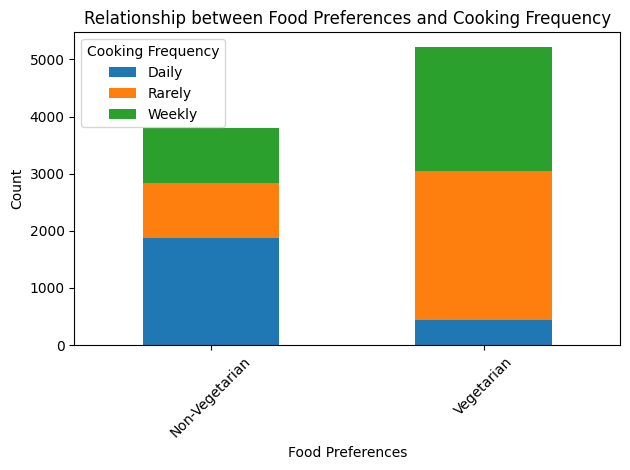

In [211]:
# Group by 'Food Preferences' and 'Cooking Frequency' and count occurrences
grouped_counts = df_analysis.groupby(['Food_Preferences', 'Cooking_Frequency']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', stacked=True)
plt.xlabel('Food Preferences')
plt.ylabel('Count')
plt.title('Relationship between Food Preferences and Cooking Frequency')
plt.xticks(rotation=45)
plt.legend(title='Cooking Frequency')
plt.tight_layout()
plt.show()

N.B.: a great number of people is vegetarian

##Third Analysis


This plot shows how can an awarness program affect in food waste education

<Figure size 1000x600 with 0 Axes>

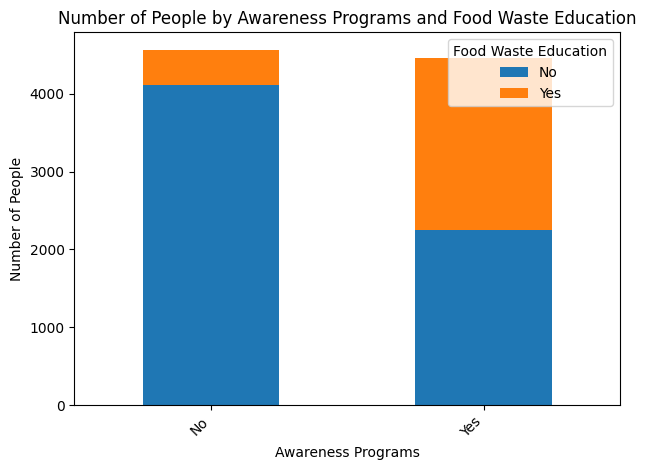

Food_Waste_Education    No   Yes
Awareness_Programs              
No                    4112   447
Yes                   2246  2206


In [212]:
# Group by 'Awareness_Programs' and 'Food_Waste_Education' and count occurrences
combination_counts = df_analysis.groupby(['Awareness_Programs', 'Food_Waste_Education']).size().unstack()

# Plotting the result
plt.figure(figsize=(10, 6))
combination_counts.plot(kind='bar', stacked=True)
plt.xlabel('Awareness Programs')
plt.ylabel('Number of People')
plt.title('Number of People by Awareness Programs and Food Waste Education')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Food Waste Education')
plt.tight_layout()
plt.show()

# Display the combination_counts table
print(combination_counts)

Analysing the plot one can say an awarness programs is recommended to decrease food wasting; moreover it could be improved since there is still a good slice of people which althought atteding it, they waste a lot of food indeed

##Fourth Analysis


This analysis is to understand what either urban and rural people eat the most

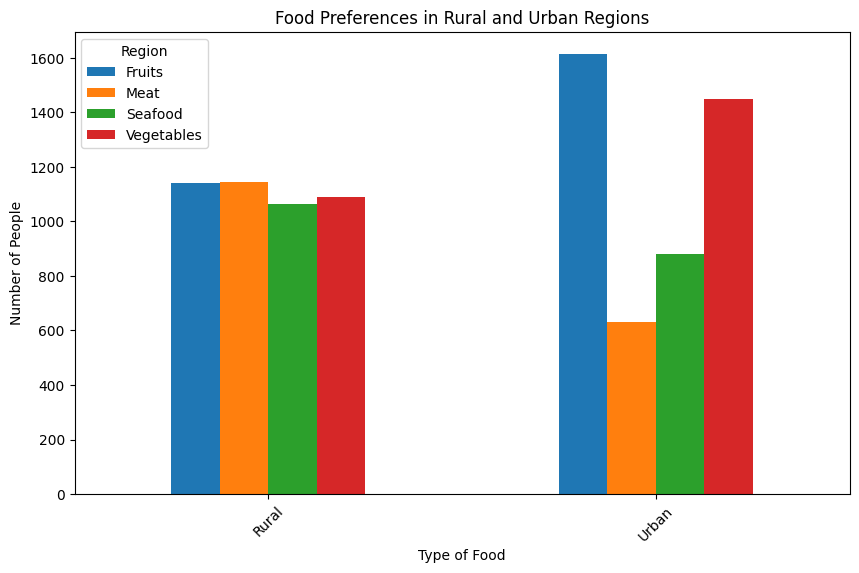

In [213]:
# Group the data by 'region' and 'type of food', then count the occurrences
food_counts = df_analysis.groupby(['Urban_Rural', 'Food_Type']).size().unstack(fill_value=0)

# Plot the results
food_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Food Preferences in Rural and Urban Regions')
plt.xlabel('Type of Food')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

As one can see from the histogram rural people's diet is well balanced, on the other hand urban's diet tends to a vegetarian diet  

##Fifth Analysis

In here the goal is to analyse the frequency of grocery shopping for each household size category

In [214]:
df_analysis['Grocery_Shopping_Frequency']

0        Monthly
1        Monthly
2          Daily
3          Daily
4          Daily
          ...   
10267     Weekly
10268      Daily
10271      Daily
10274     Weekly
10275      Daily
Name: Grocery_Shopping_Frequency, Length: 9011, dtype: object

In [215]:
# Map the shopping frequency to numerical values for easier calculation
frequency_mapping = {'Weekly': 7, 'Daily': 1, 'Monthly': 30}
df_analysis.loc[:, 'Grocery_Shopping_Frequency'] = df_analysis['Grocery_Shopping_Frequency'].map(frequency_mapping)

# Calculate the average frequency for each household size
average_frequency_by_size = df_analysis.groupby('Household_Size')['Grocery_Shopping_Frequency'].mean()

# Display the results
print("Average grocery shopping frequency for each household size:")
print(average_frequency_by_size)

Average grocery shopping frequency for each household size:
Household_Size
1    12.339130
2     6.620796
3     5.187719
4     3.539010
5     1.294679
Name: Grocery_Shopping_Frequency, dtype: float64


<ipython-input-215-6cea0f21e946>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_analysis.loc[:, 'Grocery_Shopping_Frequency'] = df_analysis['Grocery_Shopping_Frequency'].map(frequency_mapping)


For a better visualization of the results a pie chart is plotted

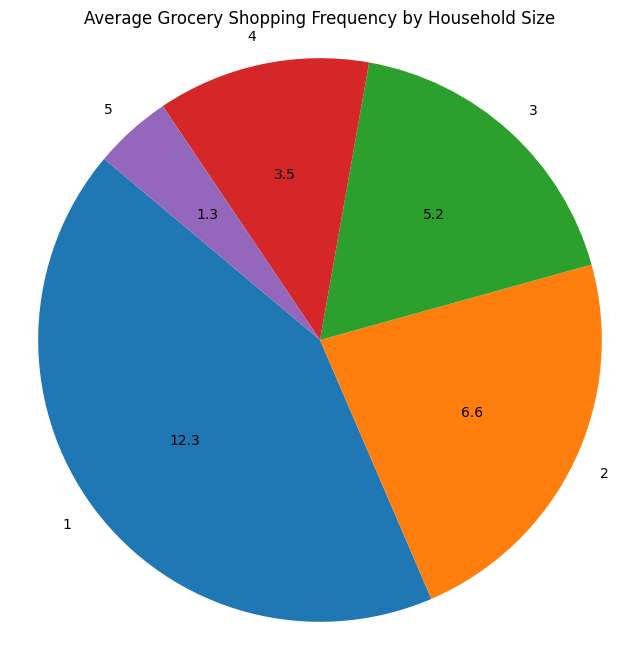

In [216]:
# Plot the results using a pie chart
plt.figure(figsize=(8, 8))

plt.pie(average_frequency_by_size, labels=average_frequency_by_size.index, autopct=lambda p: f'{p * sum(average_frequency_by_size) / 100:.1f}', startangle=140)

#plt.pie(average_frequency_by_size, labels=average_frequency_by_size.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Grocery Shopping Frequency by Household Size')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Now the same is done using an histogram

<ipython-input-217-bc7257a60d8b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Household_Size', y='Grocery_Shopping_Frequency', data=average_frequency_by_size, palette='viridis')


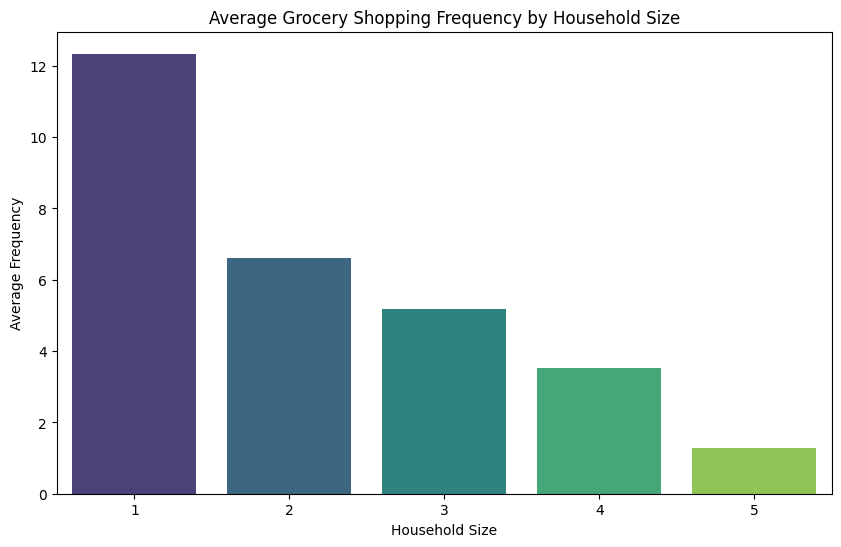

In [217]:
# Calculate the average frequency for each household size
average_frequency_by_size = df_analysis.groupby('Household_Size')['Grocery_Shopping_Frequency'].mean().reset_index()

# Plot the results using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Household_Size', y='Grocery_Shopping_Frequency', data=average_frequency_by_size, palette='viridis')
plt.title('Average Grocery Shopping Frequency by Household Size')
plt.xlabel('Household Size')
plt.ylabel('Average Frequency')
plt.show()

An exponential decay of the frequency is shown as the size of household increases

##Sixth Analysis

Last analysis involves the creation of 'Expenditure_Per_Person' feature. It is computed as the ratio between 'Weekly_Grocery_Expenditure' and 'Household_Size'.

This is done to calculate the average in order to understand if it's actually true the theory of singles spending more money rather than families


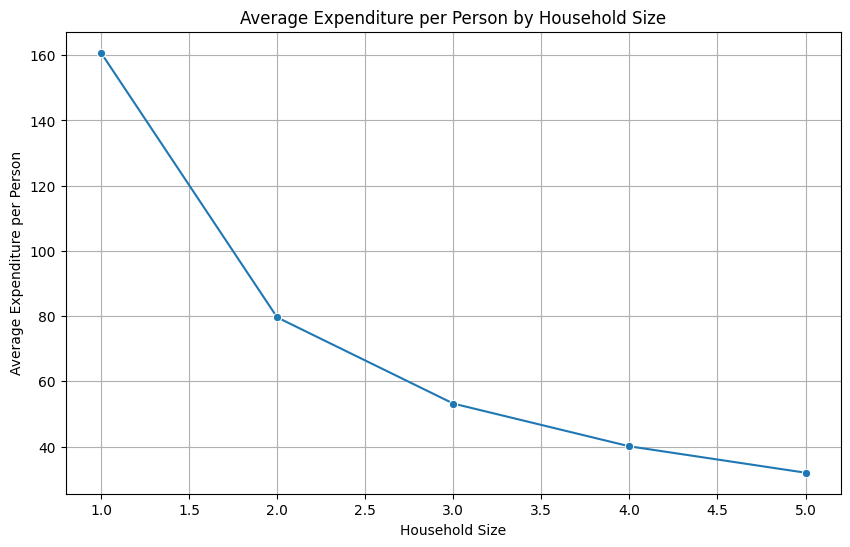

In [218]:
# Calculate expenditure per person for each family
df_analysis['Expenditure_Per_Person'] = df_analysis['Weekly_Grocery_Expenditure'] / df_analysis['Household_Size']

# Group by Household_Size and calculate the average expenditure per person
average_expenditure_per_person_by_size = df_analysis.groupby('Household_Size')['Expenditure_Per_Person'].mean().reset_index()

# Plot the results using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Household_Size', y='Expenditure_Per_Person', data=average_expenditure_per_person_by_size, marker='o')
plt.title('Average Expenditure per Person by Household Size')
plt.xlabel('Household Size')
plt.ylabel('Average Expenditure per Person')
plt.grid(True)
plt.show()

At the end, it is clear that singles spend the most (100% more than a 2 member-family)